In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
get_ipython().magic('matplotlib inline')

In [3]:
zspectra = pd.read_csv('centered_cest.csv', header = None).values
t2_signal = pd.read_csv('t2_signal.csv', header = None).values
t2 = pd.read_csv('t2_par.csv', header = None).values
conc = pd.read_csv('concentration.csv', header = None).values
pH = pd.read_csv('pH.csv', header = None).values
concs = pd.read_csv('concs.csv', header = None).values
pHs = pd.read_csv('pHs.csv', header = None).values

In [4]:
def mymetric(yexp, ypred):
    d = np.sum((yexp - ypred)**2 )
    d = d / ypred.shape[0]
    d = np.sqrt(d)
    d = d / np.mean(yexp)
    d = 100 * d
    return d

In [5]:
Y = conc
Ys = np.sort(concs)

In [6]:
Ys

array([[  27.87,   34.84,   43.55,   54.44,   68.05,   85.07,  106.33,
         132.92,  166.15]])

Min =  27.273099367 %


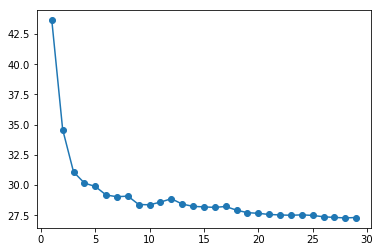

In [13]:
X = zspectra
num_components = 30


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    y_test=y_test/y_train.max()
    y_train=y_train/y_train.max()
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')


In [14]:
y_hat

array([[ 0.18360978],
       [ 0.12169511],
       [ 0.80538581],
       [ 0.85703244],
       [ 0.18646708],
       [ 0.20486126],
       [ 0.19993669],
       [ 0.87285847],
       [ 0.62178391],
       [ 0.2043197 ],
       [ 0.62897609],
       [ 0.54654137],
       [ 0.35877768],
       [ 0.63187567],
       [ 0.59631839],
       [ 0.40839208],
       [ 0.49789556],
       [ 0.1800769 ],
       [ 0.33593338],
       [ 0.2280763 ],
       [ 0.76465577],
       [ 0.87370473],
       [ 0.28489761],
       [ 0.83235266],
       [ 0.09721287],
       [ 0.80395082],
       [ 0.31281651],
       [ 0.34458717],
       [ 0.58334963],
       [ 0.27126421],
       [ 0.70671346],
       [ 0.50899566],
       [ 0.20347865],
       [ 0.30396689],
       [ 0.37709222],
       [ 0.45057312],
       [ 0.35823331],
       [ 0.68136641],
       [ 0.28507558],
       [ 0.476824  ],
       [ 0.32637133],
       [ 0.31712089],
       [ 0.79516889],
       [ 0.67017012],
       [ 0.3817333 ],
       [ 0

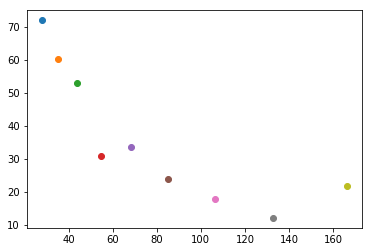

In [8]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [9]:
X = np.concatenate((zspectra,t2_signal),axis = 1)
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

KeyboardInterrupt: 

In [ ]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [ ]:
X = np.concatenate((zspectra,t2),axis = 1)
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

In [ ]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [ ]:
X = t2_signal
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

for idx,K in enumerate(np.arange(1,num_components)):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
    pls = PLSRegression(n_components = K, scale = False)
    pls.fit(X_train, y_train)
    y_hat = pls.predict(X_test)
    Error[idx] = mymetric(y_test , y_hat)

plt.plot( np.arange(1,num_components), Error ,'o-')
print('Min = ', Error.min(),'%')

In [ ]:
K=Error.argmin()+1
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = K, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)

Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [ ]:
X = t2
num_components = X.shape[1]


Error = np.zeros((num_components -1,1))

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.05, random_state=42)
pls = PLSRegression(n_components = num_components, scale = False)
pls.fit(X_train, y_train)
y_hat = pls.predict(X_test)
Error = mymetric(y_test , y_hat)
print('Min = ', Error.min(),'%')

In [ ]:
Error_dum = np.zeros(Ys.shape)
for idk,K in enumerate(np.arange(0,Ys.shape[1])):
    Error_dum[0,K] = mymetric(y_test[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))], y_hat[np.where(y_test==(np.ones(y_test.shape)*Ys[0,K]))])
    
plt.plot(Ys,Error_dum,'o-')

In [ ]:
'''
steps = [1,4,8]
labels = list()

for step in steps:
    X = zspectra[:, 0:101:step]
    labels.append(int(X.shape[1]))
    Y = pH
    num_components = 10
    Error = np.zeros((num_components -1,1))

    for idx,K in enumerate(np.arange(1,num_components)):
        X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.50, random_state=42)
        pls = PLSRegression(n_components = K, scale = False)
        pls.fit(X_train, y_train)
        y_hat = pls.predict(X_test)
        Error[idx] = mymetric(y_test , y_hat)

    plt.plot( np.arange(1,num_components), Error ,'o-')
    plt.legend(labels)
'''